<a href="https://colab.research.google.com/github/himalayahall/DATA602/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

NLP (Natural Language Processing), NLU (Natural Language Understanding), and NLG (Natural Language Generation) are important subtopics of Machine 
Learning. 

**NLP** it involves programming computers to process massive volumes of language data. It involves numerous tasks that break down natural language into 
smaller elements in order to understand the relationships between those elements and how they work together. NLP focuses largely on converting text to 
structured data. It does this through the identification of named entities (a process called named entity recognition) and identification of word 
patterns, using methods like tokenization, stemming, and lemmatization, which examine the root forms of words.

**NLU** (Natural Language Understanding) is a subset of natural language processing, which uses syntactic and semantic analysis of text and speech to determine the meaning of a sentence. One of the primary goals of NLU is to teach machines how to interpret and understand language inputted by humans. 
It aims to teach computers what a body of text or spoken speech means. NLU leverages AI algorithms to recognize attributes of language such as sentiment, semantics, context, and intent. It enables computers to understand the subtleties and variations of language.

**NLG** (Natural Language Generation) is also a subset of NLP and is concerned with enabling machines to not just process and understand text but to generate text. While NLU focuses on computer reading comprehension, NLG enables computers to write. NLG is the process of producing a human language 
text response based on some data input (prompt).[[1]](#1)

## Project Goal

Recent advancements in NLP, most notable the NLG capabilities of Large Language Models (LLM) like ChatGPT, have taken the public imagination by storm. In this project we will explore the following:

- **NLP**: create a classifier to classify product reviews as either original (presumably human created and authentic) or fake (computer generated fake reviews). The motivation for using this dataset is that fake reviews are a major problem, as highlighted in the NPR article [Why we usually can't tell when a review is fake](https://www.npr.org/sections/money/2023/03/07/1160721021/why-we-usually-cant-tell-when-a-review-is-fake), and it would be great to leverage NLP to address the problem.
  - Use [Fastai](https://docs.fast.ai) to build the classifier. This will be accomplished by taking a pretrained language model and fine-tuning it to classify reviews.  What we call a language model is a model that has been trained to guess what the next word in a text is (having read the ones before). This kind of task is called self-supervised learning: we do not need to give labels to our model, just feed it lots and lots of texts. It has a process to automatically get labels from the data, and this task isn't trivial: to properly guess the next word in a sentence, the model will have to develop an understanding of the English (or other) language.[[2]](#2)
- **NLU**: the English learned by the pretrained language model (Wikipedia) is slightly different from the English used for product reviews, so instead of jumping directly to the classifier, we will fine-tune our pretrained language model to the product corpus and then use that as the base for our classifier. This should (hopefully) result in better performance.
- **NLG**: finally, having created a language model that has been fine-tuned for product reviews, we will use it to auto-generate fake reviews. This will be done by giving the model some starting text (prompt) and then asking the model to generate the rest (up to a maximum number of words).

## Data Sources

The generated [fake reviews dataset](https://osf.io/3vds7), containing 20k fake reviews and 20k real product reviews. OR = Original reviews (presumably human created and authentic); CG = Computer-generated fake reviews.

## Tools and Frameworks

- [Google Collab](https://colab.research.google.com)
- [Jupyter Notebook](https://jupyter.org/)
- [Fastai](https://docs.fast.ai)

## References
<a id="1">[1]</a>
https://www.ibm.com/topics/natural-language-processing

<a id="2">[2]</a>
https://fastai.github.io/fastbook2e/book10.html


# Load data

In [42]:
import pandas as pd
import re

df = pd.read_csv('https://raw.githubusercontent.com/himalayahall/DATA607/main/Project4/EMAILSpamCollectionFull.csv')

In [43]:
df.head()

,id,from,subject,category,text
0,1,robert elz <kre@munnari.oz.au>,re: new sequences window,ham,"Date: Wed, 21 Aug 2002 10:54:46 -0500 From: Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com> Message-ID: <1029945287.4797.TMDA@deepeddy.vircio.com> | I can't reproduce this error.For me it is very repeatable... (like every time, without fail).This is the debug log of the pick happening ...18:19:03 Pick_It {exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace} {4852-4852 -sequence mercury}18:19:03 exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace 4852-4852 -sequence mercury18:19:04 Ftoc_PickMsgs {{1 hit}}18:19:04 Marking ..."
1,2,steve burt <steve_burt@cursor-system.com>,[zzzzteana] re: alexander,ham,"Martin A posted:Tassos Papadopoulos, the Greek sculptor behind the plan, judged that the limestone of Mount Kerdylio, 70 miles east of Salonika and not far from the Mount Athos monastic community, was ideal for the patriotic sculpture. As well as Alexander's granite features, 240 ft high and 170 ft wide, a museum, a restored amphitheatre and car park for admiring crowds areplanned---------------------So is this mountain limestone or granite?If it's limestone, it'll weather pretty fast.------------------------ Yahoo! Groups Sponsor ---------------------~-->4 DVDs Free +s&p Join Nowhttp:/..."
2,3,"""tim chapman"" <timc@2ubh.com>",[zzzzteana] moscow bomber,ham,"Man Threatens Explosion In Moscow Thursday August 22, 2002 1:40 PMMOSCOW (AP) - Security officers on Thursday seized an unidentified man whosaid he was armed with explosives and threatened to blow up his truck infront of Russia's Federal Security Services headquarters in Moscow, NTVtelevision reported.The officers seized an automatic rifle the man was carrying, then the mangot out of the truck and was taken into custody, NTV said. No other detailswere immediately available.The man had demanded talks with high government officials, the Interfax andITAR-Tass news agencies said. Ekho Moskvy ..."
3,4,monty solomon <monty@roscom.com>,[irr] klez: the virus that won't die,ham,"Klez: The Virus That Won't Die Already the most prolific virus ever, Klez continues to wreak havoc.Andrew Brandt>>From the September 2002 issue of PC World magazinePosted Thursday, August 01, 2002The Klez worm is approaching its seventh month of wriggling across the Web, making it one of the most persistent viruses ever. And experts warn that it may be a harbinger of new viruses that use a combination of pernicious approaches to go from PC to PC.Antivirus software makers Symantec and McAfee both report more than 2000 new infections daily, with no sign of letup at press time. The British s..."
4,5,tony nugent <tony@linuxworks.com.au>,re: insert signature,ham,"On Wed Aug 21 2002 at 15:46, Ulises Ponce wrote:> Hi!> > Is there a command to insert the signature using a combination of keys and not> to have sent the mail to insert it then?I simply put it (them) into my (nmh) component files (components,replcomps, forwcomps and so on). That way you get them when you areediting your message. Also, by using comps files for specificfolders you can alter your .sig per folder (and other tricks). Seethe docs for (n)mh for all the details.There might (must?) also be a way to get sedit to do it, but I'vebeen using gvim as my exmh message editor for a long..."


Drop all columns except text and category.

In [44]:
df.drop(columns=['from', 'subject'], inplace=True)
df

,id,subject,category,text
0,1,re: new sequences window,ham,"Date: Wed, 21 Aug 2002 10:54:46 -0500 From: Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com> Message-ID: <1029945287.4797.TMDA@deepeddy.vircio.com> | I can't reproduce this error.For me it is very repeatable... (like every time, without fail).This is the debug log of the pick happening ...18:19:03 Pick_It {exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace} {4852-4852 -sequence mercury}18:19:03 exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace 4852-4852 -sequence mercury18:19:04 Ftoc_PickMsgs {{1 hit}}18:19:04 Marking ..."
1,2,[zzzzteana] re: alexander,ham,"Martin A posted:Tassos Papadopoulos, the Greek sculptor behind the plan, judged that the limestone of Mount Kerdylio, 70 miles east of Salonika and not far from the Mount Athos monastic community, was ideal for the patriotic sculpture. As well as Alexander's granite features, 240 ft high and 170 ft wide, a museum, a restored amphitheatre and car park for admiring crowds areplanned---------------------So is this mountain limestone or granite?If it's limestone, it'll weather pretty fast.------------------------ Yahoo! Groups Sponsor ---------------------~-->4 DVDs Free +s&p Join Nowhttp:/..."
2,3,[zzzzteana] moscow bomber,ham,"Man Threatens Explosion In Moscow Thursday August 22, 2002 1:40 PMMOSCOW (AP) - Security officers on Thursday seized an unidentified man whosaid he was armed with explosives and threatened to blow up his truck infront of Russia's Federal Security Services headquarters in Moscow, NTVtelevision reported.The officers seized an automatic rifle the man was carrying, then the mangot out of the truck and was taken into custody, NTV said. No other detailswere immediately available.The man had demanded talks with high government officials, the Interfax andITAR-Tass news agencies said. Ekho Moskvy ..."
3,4,[irr] klez: the virus that won't die,ham,"Klez: The Virus That Won't Die Already the most prolific virus ever, Klez continues to wreak havoc.Andrew Brandt>>From the September 2002 issue of PC World magazinePosted Thursday, August 01, 2002The Klez worm is approaching its seventh month of wriggling across the Web, making it one of the most persistent viruses ever. And experts warn that it may be a harbinger of new viruses that use a combination of pernicious approaches to go from PC to PC.Antivirus software makers Symantec and McAfee both report more than 2000 new infections daily, with no sign of letup at press time. The British s..."
4,5,re: insert signature,ham,"On Wed Aug 21 2002 at 15:46, Ulises Ponce wrote:> Hi!> > Is there a command to insert the signature using a combination of keys and not> to have sent the mail to insert it then?I simply put it (them) into my (nmh) component files (components,replcomps, forwcomps and so on). That way you get them when you areediting your message. Also, by using comps files for specificfolders you can alter your .sig per folder (and other tricks). Seethe docs for (n)mh for all the details.There might (must?) also be a way to get sedit to do it, but I'vebeen using gvim as my exmh message editor for a long..."
...,...,...,...,...
9345,9346,NaN,spam,NaN
9346,9347,NaN,spam,NaN
9347,9348,NaN,spam,NaN
9348,9349,NaN,spam,NaN


In [45]:
df.describe(include='object')

,subject,category,text
count,7903,9350,7953
unique,3491,2,4618
top,[spambayes] test sets?,ham,
freq,58,5553,84


# Cleanup Data

Drop NAs and strip HTML tags.

In [46]:
df.dropna(inplace=True)
df['text'] = df['text'].str.replace('<[^<>]*>', ' ', regex=True)
print(df.head())
df.describe(include='object')

   id                               subject category  \
0   1              re: new sequences window      ham   
1   2             [zzzzteana] re: alexander      ham   
2   3             [zzzzteana] moscow bomber      ham   
3   4  [irr] klez: the virus that won't die      ham   
4   5                  re: insert signature      ham   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      text  
0       Date:        Wed, 21 Aug 2002 10:54:46 -0500    Fr

,subject,category,text
count,7903,7903,7903
unique,3491,2,4553
top,[spambayes] test sets?,ham,
freq,58,5549,48


## Compute NULL model (baseline) accuracy

As expected, this dataset is unbalanced (more $ham$ than $spam$ observations) and the $null$ model has 70% accuracy. The $null$ model always predicts the majority class ($ham$) and is useless for detecting $spam$ emails.

As a result, we know that a model worth considering must have accuracy significantly greater than 70%.

In [47]:
cat_size = df.groupby('category').size()
print(cat_size)

ham_prop = cat_size[0] / (cat_size[0] + cat_size[1])
print('Baseline (null model) accuracy: ' , ham_prop)

category
ham     5549
spam    2354
dtype: int64
Baseline (null model) accuracy:  0.7021384284448944


## Fastai

We will use the fastai framework to build a large language model (LLM). Fastai is a great framework that enables rapid creating of predictive models without the need to code lower level artifacts as in Tensorflow or PyTorch.

In [48]:
from fastai.data.all import *
from fastai.text.all import *

Create data loaders for classification, build **DataBlock** using **TextBlock** and **CategoryBlock**.

Set aside 20% data using **TrainTestSplitter** for model testing.

In [50]:
dls_cls = DataBlock(
            blocks=(
                TextBlock.from_df(text_cols=('text'), 
                        is_lm=False),
                CategoryBlock),
            get_x=ColReader('text'), 
            get_y=ColReader('category'),
            splitter=TrainTestSplitter(test_size=0.2,stratify=df.category)
        ).dataloaders(df)

In [51]:
dls_cls.show_batch(max_n = 5)

,text,category
0,"xxbos xxmaj this is a multi - part message in xxup mime format . xxrep 6 - = _ nextpart _ xxrep 3 0 _ xxrep 3 0 2_01c228ca.593b5280content - type : text / plain ; \t xxunk - xxunk - transfer - encoding : xxunk < xxunk xxrep 3 $ xxunk ! # xxunk ! # xxunk % / % xxunk , xxunk ! $ xxunk % / $ xxunk xxrep 3 $ xxunk , xxunk ! # xxunk : xxunk $ xxunk # ! xxunk xxrep 3 $ xxup xxunk / $ @$5$$ ! # ! xxunk / ! xxunk > xxunk $ / $ * 4j xxrep 5 $ ? $ 7$^$9 ! # xxunk xxrep 38 - + xxunk \ xxunk # % "" xxunk \ % xxunk # % xxunk ! e = xxunk xxunk - mail : xxunk : 03 - 3518 - xxunk",ham
1,"xxbos xxmaj this is a multi - part message in xxup mime format . xxrep 6 - = _ nextpart _ xxrep 3 0 _ xxrep 3 0 2_01c228ca.593b5280content - type : text / plain ; \t xxunk - xxunk - transfer - encoding : xxunk < xxunk xxrep 3 $ xxunk ! # xxunk ! # xxunk % / % xxunk , xxunk ! $ xxunk % / $ xxunk xxrep 3 $ xxunk , xxunk ! # xxunk : xxunk $ xxunk # ! xxunk xxrep 3 $ xxup xxunk / $ @$5$$ ! # ! xxunk / ! xxunk > xxunk $ / $ * 4j xxrep 5 $ ? $ 7$^$9 ! # xxunk xxrep 38 - + xxunk \ xxunk # % "" xxunk \ % xxunk # % xxunk ! e = xxunk xxunk - mail : xxunk : 03 - 3518 - xxunk",ham
2,"xxbos xxmaj this is a multi - part message in xxup mime format -- xxunk - d1b9 - 43d5 - xxunk - type : text / plain ; charset = gb2312content - transfer - encoding : quoted - printabledear xxunk fetch your name by xxunk month , our group had set up one xxup xxunk with xxmaj korean xxmaj xxunk xxmaj motors & = machinery xxunk company produces and distributes various whole motorcycle units =( xxunk ranging from xxunk to xxunk , including two - wheel motorcycle and three - wheel motorcycle , for carrying goods = and taking passengers ) and accessories especially main accessories of motorcycle , such as engine =( including xxunk , xxunk connecting rod , xxunk , engine xxunk head , xxunk body , clutch , = xxunk and xxunk rings ) , frame , fuel tank , shock absorber , disk xxunk , panels",spam
3,"xxbos xxmaj this is a multi - part message in xxup mime format . xxrep 6 - = _ nextpart_7hzmysbwvsemnjin8kg9ycontent - type : multipart / alternative ; \t boundary= "" xxrep 4 - = _ nextpart_7hzmysbwvsemnjin8kg9yaa "" xxrep 6 - = _ xxunk - type : text / html ; \t charset=""big5""content - transfer - encoding : xxunk xxrep 6 - = _ nextpart_7hzmysbwvsemnjin8kg9yaa xxrep 8 - = _ nextpart_7hzmysbwvsemnjin8kg9ycontent - type : application / octet - stream ; \t name= "" . / massmail-1509_files / xxunk - transfer - encoding : base64content - disposition : attachment ; \t xxunk xxrep 4 a xxunk xxrep 4 a xxunk xxrep 4 a xxmaj xxunk xxrep 4 a xxunk xxrep 4 a xxunk xxrep 3 a xxmaj ox xxrep 3 a xxunk / xxunk / xxunk / xxunk / xxunk / xxunk / xxunk / xxunk / xxunk / xxunk / xxunk",spam
4,"xxbos i did more testing with your patch on top of today 's xxup cvs , but the xxunk help at all.the following is the results of the tests : testing xxunk . created a "" / dev / md0 "" with 4 scsi xxunk . created a xxup lvm xxmaj volume group "" vg "" with the "" / dev / xxunk . created a xxup lvm logical volume "" vol1 "" with "" xxunk . created a xxup xfs fs with a command : mkfs.xfs -f -d xxunk / dev / vg / vol1 xxrep 11 - meta - data= / dev / vg / vol1 xxunk xxunk blks xxrep 11 - data = bsize=4096 xxunk xxrep 11 - = sunit=1 xxunk blks , xxunk xxrep 11 - naming = version 2 bsize=4096 xxrep 11 - log = internal log bsize=4096 xxunk xxrep 11 - = sunit=1 blks",ham


## Text Classifier

Create classifier. Notice,  there is no need to  pre-process text data for the classifier, e.g. create word embeddings, the framework does that automatically.

In [12]:
learner = text_classifier_learner(dls_cls, 
                                    AWD_LSTM, 
                                    drop_mult=0.5, 
                                    metrics=[accuracy, Precision(), Recall(), F1Score()])

Calculate the optimal learning rate hyper-parameter. This will greatly influence how quickly the model converges.

SuggestedLRs(valley=0.0030199517495930195)

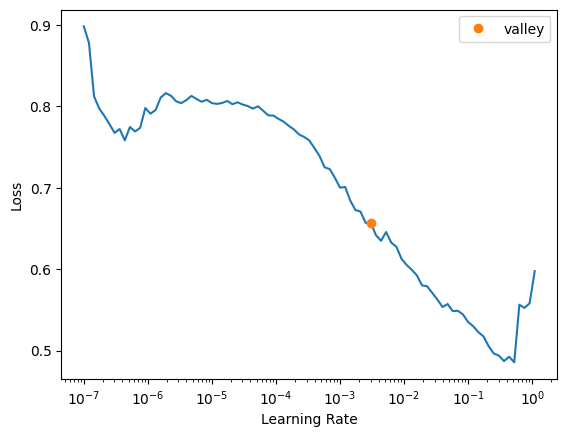

In [13]:
lr = learner.lr_find()
lr

Fine tune model for 3 epochs using above learning rate.

In [14]:
learner.fine_tune(3, lr[0])

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,0.300826,0.190151,0.935261,0.896842,0.887500,0.892147,00:59


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,0.195772,0.093931,0.977373,0.944000,0.983333,0.963265,01:54
1,0.138644,0.075552,0.978630,0.974468,0.954167,0.964211,01:57
2,0.099946,0.052381,0.988686,0.983264,0.979167,0.981211,01:54


## Interpret results

F1-score (balanced score between Precision/Recall) is great and so are Precision/Recall. Most importantly, this model significantly outperforms the $null$ model.

Note - the model was tuned using GPUs, tuning on CPUs will take significantly longer (hours).

Show a few predictions on training data, the predictions are in the new _$category$ column.

In [15]:
learner.show_results()

,text,category,category_
0,xxbos xxmaj this is a multi - part message in xxup mime format -- xxunk - xxunk - b6fa-0050ba415022content - type : text / plain ; charset = gb2312content - transfer - encoding : quoted - printable = cb = c4 = b4 = f3 = cb = d8 = d6 = ca = c5 = e0 = d1 = f8 = b4 = f2 = d4 = xxunk xxup mba = bd = cc = d3 = fd = b5 = c4 = cc = d8 = b5 = e3 = a3 = ac = d4 = da = cb = d8 = d6 = ca = c5 = e0 = d1 = f8 = xxunk = d7 = dc = ca = c7 = d2 = d4 = d3 = c5 = d0 = e3 = b9 = dc = c0 = ed = c8 = cb =,spam,spam
1,"xxbos xxmaj reply xxmaj from xxunk following message was recieved xxmaj saturday , 13 xxmaj july xxunk has been xxunk or changed . i hold no xxunk for xxunk of this xxunk : enenkio truth ( xxunk : xxmaj sat , 13 xxmaj jul 2002 xxunk xxunk : enenkio@webtv.net ( robert xxunk : xxunk truth ( xxunk xxmaj news xxmaj archives xxunk xxup news xxup releases xxup and xxunk 28 , 1 xxrep 3 9 : xxmaj replies to xxmaj asia xxunk 22 , 1 xxrep 3 9 : xxmaj news xxmaj release - xxmaj gold xxunk 4 , 1 xxrep 3 9 : xxmaj replies to xxmaj published articlesjune 3 , 1 xxrep 3 9 : xxmaj replies to xxmaj published articlesjune 2 , 1 xxrep 3 9 : xxmaj replies to xxmaj published articlesjune 1 , 1 xxrep 3 9 : xxmaj news xxmaj release , xxmaj reply",spam,spam
2,"xxbos xxmaj this is a multi - part message in xxup mime format . xxrep 6 - = _ nextpart_7hzmysbwvsemnjin8kg9ycontent - type : multipart / alternative ; \t boundary= "" xxrep 4 - = _ nextpart_7hzmysbwvsemnjin8kg9yaa "" xxrep 6 - = _ xxunk - type : text / html ; \t charset=""big5""content - transfer - encoding : xxunk xxrep 6 - = _ nextpart_7hzmysbwvsemnjin8kg9yaa xxrep 8 - = _ nextpart_7hzmysbwvsemnjin8kg9ycontent - type : application / octet - stream ; \t name= "" . / massmail-1509_files / xxunk - transfer - encoding : base64content - disposition : attachment ; \t xxunk xxrep 4 a xxunk xxrep 4 a xxunk xxrep 4 a xxmaj xxunk xxrep 4 a xxunk xxrep 4 a xxunk xxrep 3 a xxmaj ox xxrep 3 a xxunk / xxunk / xxunk / xxunk / xxunk / xxunk / xxunk / xxunk / xxunk / xxunk / xxunk",spam,spam
3,"xxbos xxmaj this is a multi - part message in xxup mime format . xxrep 6 - = _ nextpart _ xxrep 3 0 _ 01bc2b74.89d1 xxrep 3 c 0content - type : multipart / alternative ; \t boundary= "" xxrep 4 - = _ nextpart_84815c5abaf209ef376268c8 "" xxrep 6 - = _ nextpart_84815c5abaf209ef376268c8content - type : text / plain ; charset = windows-1252content - transfer - encoding : quoted - printabledear xxmaj sir / xxunk you a wonderful xxunk xxmaj with an offer , to save you money and xxunk xxmaj shopping from the convenience from home or xxunk shopping , a new way to go window xxunk xxmaj our online super xxunk offers over 1500 quality products , with 15 plus xxunk you to , window shop xxunk following are xxmaj e - coupons numbers , which you can use with any order=2e xxmaj y = ou place from",spam,spam
4,"xxbos xxmaj this is a multi - part message in xxup mime format . xxrep 6 - = _ nextpart _ xxrep 3 0 _ xxrep 4 0 _ 01c24a39.4307a140content - type : text / plain ; \t charset=""iso-8859 - 1""content - transfer - encoding : quoted - printable \t▁\t▁ = 09 \t▁\t = 20 \t▁\t▁ = 09=20 \t▁ = 09 = 09 = xxunk xxmaj player xxmaj please click on the image to play the trailer . = 20 \t = 20=09 = 09 = 09 \t▁\t▁ = 09 = 09 \t▁ xxmaj go out and see a movie tonight ! \t▁\t = 20 = 09 = 09=20 \t = 20 = 09 = 09 = 09 = 09 \t▁\t▁ = 09 = 09 \t▁ xxup enter xxup for xxup your xxup chance xxup to xxup win ! \t▁\t = 20 = 09 = 09 = 09 \t▁\t▁ =",ham,ham
5,"xxbos xxmaj core xxmaj java xxmaj technologies xxmaj technical xxmaj tips xxup code { color : # xxrep 6 3 ; font - family : xxmaj verdana , xxmaj courier , xxmaj monospace ; font - size : 10pt}pre { color : # xxrep 6 3 ; font - family : xxmaj verdana , xxmaj courier , xxmaj monospace ; font - size : 10pt}body , div , span { color : # xxrep 6 3 ; font - family : xxmaj arial , xxmaj helvetica , sans - serif ; font - size : 10pt}td , th { color : # xxrep 6 3 ; font - family : xxmaj arial , 

Plot confusion matrix to see detailed model performance. Note, the confusion matrix is generated using the test data (20% of training data).

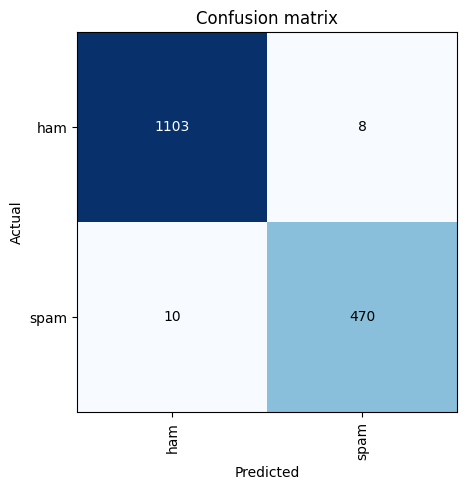

In [16]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix()

## Saving and loading model

At this point, if we wanted, we could save the model and it's trained weights. Later, the saved model could be loaded for making predictions.

In [17]:
learner.save('pretrained')

Path('models/pretrained.pth')

In [18]:
learner.load('pretrained')

# Language Model (ULMFiT approach)

The pretrained model in the previous section is called a language model. It was pretrained on Wikipedia on the task of guessing the next word, after reading all the words before. 

Notice, we are glossing over the details of exactly how many words are considered in making the prediction, what is the $loss function$, which $optimizer$ to use to fit the model, etc. Fastai selects intelligent defaults for all these paramaters are more.

We got great results by directly fine-tuning this language model to a movie review classifier, but can we do even better?

In general, with one extra step, we might do better: the Wikipedia English is slightly different from the English in our email corpus. So instead of jumping directly to the classifier, we could fine-tune our pretrained language model to the email corpus and use that as the base for our classifier. Again, in our case, the initial model performance is great so improvements, if any, will be marginal.

Create data loader for language modeling by setting $is\_lm=True$ . Set aside 10% data using **RandomSplitter** for model validation.

In [19]:
dls_lm = DataBlock(
    blocks=TextBlock.from_df(text_cols=('text'), 
                             is_lm=True),
    get_x=ColReader('text'), 
    splitter=RandomSplitter(valid_pct=0.1, seed=12345)
    ).dataloaders(df, bs=64)

In [20]:
dls_lm.show_batch(max_n = 10)

,text,text_
0,"xxbos xxup url : http : / / jeremy.zawodny.com / blog / archives / xxrep 3 0 xxunk : 2002 - 09 - xxunk - xxunk article titled xxmaj mac poses as much of challenge to xxmaj linux as to xxmaj windows is both xxunk and missing the point . xxmaj the general thrust of the article , is dead - on . xxmaj it 's just the sort of stuff xxmaj","xxup url : http : / / jeremy.zawodny.com / blog / archives / xxrep 3 0 xxunk : 2002 - 09 - xxunk - xxunk article titled xxmaj mac poses as much of challenge to xxmaj linux as to xxmaj windows is both xxunk and missing the point . xxmaj the general thrust of the article , is dead - on . xxmaj it 's just the sort of stuff xxmaj i"
1,"xxmaj ig nobelby xxmaj jay xxmaj lindsay bostonoctober 05 2002url : http : / / xxrep 3 w .theage.com.au / articles / 2002 / 10 / 04 / 1033538774048.html xxbos xxmaj these results are from timtest.py . xxmaj i 've got three sets of spam and xxunk about 500 messages in each set . xxmaj here 's what happens when i xxunk latest "" received "" header code : false positive percentages","ig nobelby xxmaj jay xxmaj lindsay bostonoctober 05 2002url : http : / / xxrep 3 w .theage.com.au / articles / 2002 / 10 / 04 / 1033538774048.html xxbos xxmaj these results are from timtest.py . xxmaj i 've got three sets of spam and xxunk about 500 messages in each set . xxmaj here 's what happens when i xxunk latest "" received "" header code : false positive percentages 0.187"
2,"/ mailman / listinfo / rpm - list xxbos xxup url : http : / / xxrep 3 w .newsisfree.com / click / xxunk / xxmaj date : 2002 - 10 - xxunk + xxunk of low - cost drugs being intercepted and sold at vast profits . xxbos xxup url : http : / / boingboing.net / # xxunk : xxmaj not xxunk xxup uk # 400 , xxrep 3 0","mailman / listinfo / rpm - list xxbos xxup url : http : / / xxrep 3 w .newsisfree.com / click / xxunk / xxmaj date : 2002 - 10 - xxunk + xxunk of low - cost drugs being intercepted and sold at vast profits . xxbos xxup url : http : / / boingboing.net / # xxunk : xxmaj not xxunk xxup uk # 400 , xxrep 3 0 ,"
3,", addresses , teams , projects , tasks , bugs , mailboxes , documents and your time xxunk these xxunk xxunk : / / sourceforge.net / projects / jboss / xxmaj the jboss / xxmaj server is the leading xxmaj open xxmaj source , standards - compliant , j2ee based application server implemented in 100 % xxmaj pure xxmaj xxunk xxmaj firewall xxmaj xxunk : / / sourceforge.net / projects / xxunk","addresses , teams , projects , tasks , bugs , mailboxes , documents and your time xxunk these xxunk xxunk : / / sourceforge.net / projects / jboss / xxmaj the jboss / xxmaj server is the leading xxmaj open xxmaj source , standards - compliant , j2ee based application server implemented in 100 % xxmaj pure xxmaj xxunk xxmaj firewall xxmaj xxunk : / / sourceforge.net / projects / xxunk /"
4,". xxbos xxmaj it will function as a router if that is what you xxunk even looks like the modem 's embedded xxup os is some kind of linux , being thatit has interesting interfaces like xxunk do n't use it as a router though … . i just have it do the absolute xxunk stuff and do all the really fun stuff like xxrep 3 p oe on my linux box","xxbos xxmaj it will function as a router if that is what you xxunk even looks like the modem 's embedded xxup os is some kind of linux , being thatit has interesting interfaces like xxunk do n't use it as a router though … . i just have it do the absolute xxunk stuff and do all the really fun stuff like xxrep 3 p oe on my linux box …"
5,"more information.call -- xxmaj please have a representative call.indicate the best time to telephone and any necessary addresses and telephone / fax numbers in the text of your reply.if you prefer you can always telephone us during normal business hours at ( 212 ) 213 - 3 xxrep 3 0 xxmaj ext 1425.thank you.p.s . -- xxmaj if you are not in need of our services at this time , please retain","information.call -- xxmaj please have a representative call.indicate t

Create text classifier learner. Use [AWD_LST]([https://arxiv.org/pdf/1708.02182.pdf]) (averaged weght-dropped long-short term memory) model architecture.

For metrics, use Perplexity (lower is better: among how many words the model is confused for predicting next word).

In [21]:
lm_learner = language_model_learner(
            dls_lm, 
            AWD_LSTM, 
            wd=0.1,
            metrics=[Perplexity()]).to_fp16()

Once more, let's find the optimal learning rate

SuggestedLRs(valley=0.007585775572806597)

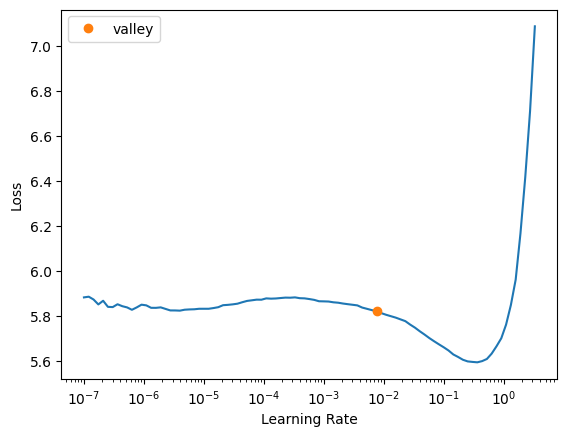

In [22]:
lr = lm_learner.lr_find()
lr

Fit one cycle. By default, aside from the final layers, other inner layers of the model are $frozen$. In other words, the pre-trained language model is kept intact, in essence this is **transfer learning**.

In [23]:
lm_learner.fit_one_cycle(1, lr[0])

epoch,train_loss,valid_loss,perplexity,time
0,4.183046,3.732076,41.765720,03:28


Save language model state after 1 epoch.

In [24]:
lm_learner.save('1epoch')

Path('models/1epoch.pth')

Now we unfreeze all layers of model for futher tuning.

In [25]:
lm_learner.unfreeze()

As before, find the optimal learning rate.

SuggestedLRs(valley=0.0003311311302240938)

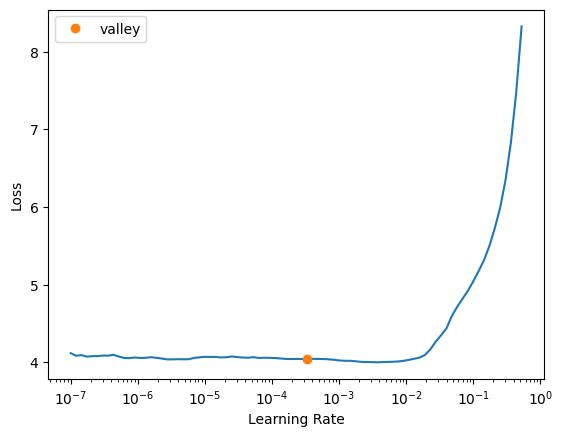

In [26]:
lr = lm_learner.lr_find()
lr

Train model for 5 epochs.

In [27]:
lm_learner.fit_one_cycle(5, lr[0])

epoch,train_loss,valid_loss,perplexity,time
0,3.737834,3.486760,32.679905,03:41
1,3.492736,3.250761,25.809980,03:37
2,3.328437,3.102983,22.264256,03:44
3,3.287548,3.038815,20.880476,03:37
4,3.237857,3.025131,20.596712,03:38


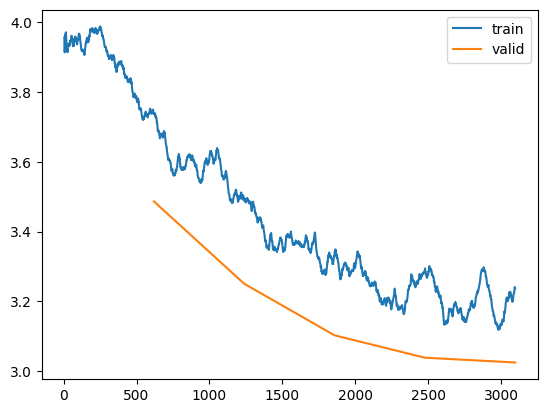

In [28]:
lm_learner.recorder.plot_loss()

Save fully tuned model.

In [29]:
lm_learner.save_encoder('finetuned')

Now we use our LLM to build a new email classifier. 

Create DataLoaders for classification using the cutomized language model. Notice, we set $is\_lm=False$ and use the vocabulary list from the LLM by setting $vocab=dls\_lm.vocab$.

In [30]:
dls_cls = DataBlock(
            blocks=(TextBlock.from_df(text_cols=('text'), 
                              is_lm=False, 
                              vocab=dls_lm.vocab), 
            CategoryBlock),
            get_x=ColReader('text'),
            get_y=ColReader('category'), 
            splitter=RandomSplitter(valid_pct=0.2, seed=12345)
            ).dataloaders(df, bs=64)

In [31]:
dls_cls.show_batch(max_n=3)

,text,category
0,"xxbos xxmaj this is a multi - part message in xxup mime format . xxrep 6 - = _ nextpart _ xxrep 3 0 _ xxrep 3 0 2_01c228ca.593b5280content - type : text / plain ; \t xxunk - xxunk - transfer - encoding : xxunk < xxunk xxrep 3 $ xxunk ! # xxunk ! # xxunk % / % xxunk , xxunk ! $ xxunk % / $ xxunk xxrep 3 $ xxunk , xxunk ! # xxunk : xxunk $ xxunk # ! xxunk xxrep 3 $ xxup xxunk / $ @$5$$ ! # ! xxunk / ! xxunk > xxunk $ / $ * 4j xxrep 5 $ ? $ 7$^$9 ! # xxunk xxrep 38 - + xxunk \ xxunk # % "" xxunk \ % xxunk # % xxunk ! e = xxunk xxunk - mail : xxunk : 03 - 3518 - xxunk",ham
1,"xxbos "" free trade and free markets have proven their ability to lift xxunk out of xxunk not a socio - political / history buff - does anybody have some xxunk ? xxrep 5 - xxmaj original xxmaj message xxrep 5 - xxmaj from : "" rohit xxmaj khare "" xxmaj to : xxmaj sent : xxmaj friday , xxmaj september 20 , 2002 xxunk pmsubject : sed / s / xxmaj united xxmaj states / xxmaj roman xxmaj empire / g > > a world where some live in comfort and plenty , while half of the human > > race lives on less than $ 2 a day , is neither just nor stable . > > xxmaj absolutely correct . xxmaj perhaps the most fundamental thing to realize about > life on xxmaj earth today . > > xxmaj the following is a fascinating document of official",ham
2,"xxbos > a world where some live in comfort and plenty , while half of the human > race lives on less than $ 2 a day , is neither just nor xxunk correct . xxmaj perhaps the most fundamental thing to realize about life on xxmaj earth xxunk following is a fascinating document of official xxmaj government policy that bears close reading . xxmaj it is the aspirations of a wonderful nation in an imperfect world . > xxmaj the war on terrorism is not a clash of civilizations . xxmaj it does , > however , reveal the clash inside a civilization , a battle for the > future of the xxmaj muslim world . xxmaj this is a struggle of ideas and this is an > area where xxmaj america must xxunk was recently at a lecture about the surprising success of xxmaj radio xxmaj sawa ,",ham


Create text classification learner.

In [32]:
learn = text_classifier_learner(dls_cls, 
                                AWD_LSTM, 
                                drop_mult=0.5, 
                                metrics=[accuracy, Precision(), Recall(), F1Score()])

In [33]:
learn = learn.load_encoder('finetuned')

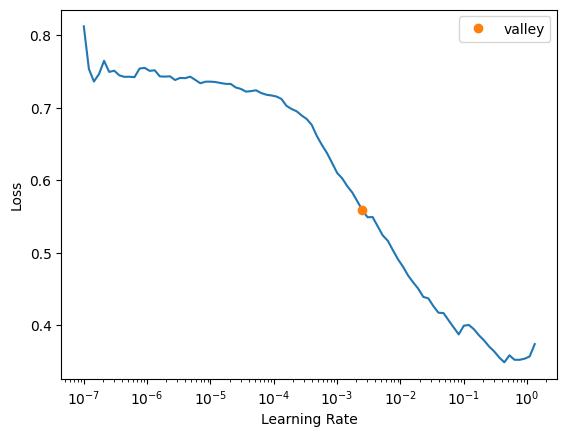

In [34]:
lr = learn.lr_find()

In [35]:
learn.fine_tune(3, lr[0])

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,0.216830,0.089146,0.971698,0.936902,0.976096,0.956098,01:00


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,0.119059,0.121743,0.960377,0.960168,0.912351,0.935649,01:57
1,0.077133,0.064694,0.980503,0.970060,0.968127,0.969093,01:57
2,0.054557,0.050227,0.980503,0.966337,0.972112,0.969215,01:58


Plot confusion matrix. Actually, this ULMFit model has performed slighly worse than the off-the-shelf pre-trained model.

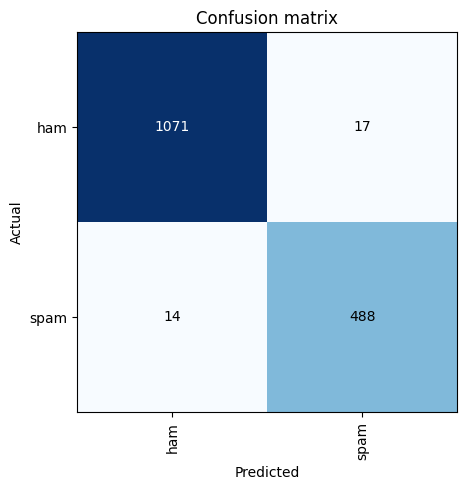

In [36]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

Finally, let's use the LLM to generate text. Text generation involves prompting with some text and asking the model to generate additional text.

In [53]:
# TEXT = "Free promotion"
# N_WORDS = 40
# N_SENTENCES = 5
# preds = [lm_learner.predict(TEXT, N_WORDS, temperature=0.75)
# for _ in range(N_SENTENCES)]
# print("\n".join(preds))
N_WORDS = 40

PROMPTS = ["We produce and distribute various motorcycles", "BIG discount this weekend sale", "I did some test on"]

preds = [lm_learner.predict(p, N_WORDS, temperature=0.75) for p in PROMPTS]

for idx in range(len(PROMPTS)):
  print(PROMPTS[idx], ': ', preds[idx])

We produce and distribute various motorcycles :  We produce and distribute various motorcycles and businesses on SALE , as well as personal phones , fax , and MP3 players to email their customers and stores . Our website is also hosted by our Spy Internet Marketing
BIG discount this weekend sale :  BIG discount this weekend sale for $ 14.95 . Get Your Free Bonus ! ! How i can get $ 10 , 000 ... Get your FREE Bonus ! Get $ 5 ,
I did some test on :  i did some test on the " test " setup for " x " in the SMTP directory at the time , but i can not take this test . Thanks michael Chris Garrigues http : / / www


We see the LLM is capable of text generation. Although not very sophisticated, keep in mind that the model was trained with a very small domain specific dataset.

Generative LLMs are transforming the technology and business landscape. And the transformer architecture is democratizing machine learning by enabling innovation at a fraction of the cost of building LLMs from scratch.